# Imports

In [2]:
#Utills
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import cv2

#sklearn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

#warnings
import warnings
warnings.filterwarnings('ignore')

# TensorFlow
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout , GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image

# Download and Read Dataset

In [2]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d gti-upm/leapgestrecog

Saving kaggle.json to kaggle (1).json
Dataset URL: https://www.kaggle.com/datasets/gti-upm/leapgestrecog
License(s): CC-BY-NC-SA-4.0
100% 2.12G/2.13G [01:17<00:00, 36.4MB/s]
100% 2.13G/2.13G [01:17<00:00, 29.5MB/s]


In [3]:
!unzip leapgestrecog.zip

Streaming output truncated to the last 5000 lines.
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0001.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0002.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0003.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0004.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0005.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0006.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0007.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0008.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0009.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0010.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0011.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0012.png  
  inflating: leapgestrecog/leapGestRe

In [5]:
train_dir = 'leapGestRecog/00'

# Count the training data in '00'
num_train_files = 0
for root, dirs, files in os.walk(train_dir):
        num_train_files = num_train_files + len(files)

print(f"Number of training files in '00': {num_train_files}")

Number of training files in '00': 20000


In [6]:
folder_names = os.listdir(train_dir)
print(folder_names)

['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']


In [7]:
for folder_name in folder_names:
    folder_path = os.path.join(train_dir, folder_name)
    if os.path.isdir(folder_path):
        num_files = len(os.listdir(folder_path))
        print(f"Number of files in '{folder_name}': {num_files}")

Number of files in '01_palm': 2000
Number of files in '02_l': 2000
Number of files in '03_fist': 2000
Number of files in '04_fist_moved': 2000
Number of files in '05_thumb': 2000
Number of files in '06_index': 2000
Number of files in '07_ok': 2000
Number of files in '08_palm_moved': 2000
Number of files in '09_c': 2000
Number of files in '10_down': 2000


In [8]:
image_paths = []
labels = []

for folder_name in folder_names:
    folder_path = os.path.join(train_dir, folder_name)
    if os.path.isdir(folder_path):
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            if os.path.isfile(file_path):
                image_paths.append(file_path)
                labels.append(folder_name)

# Explore data

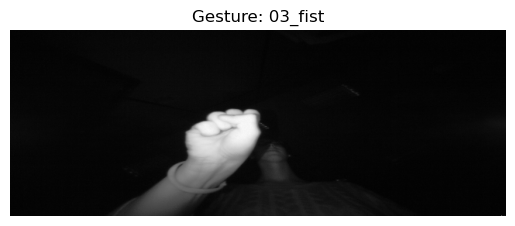

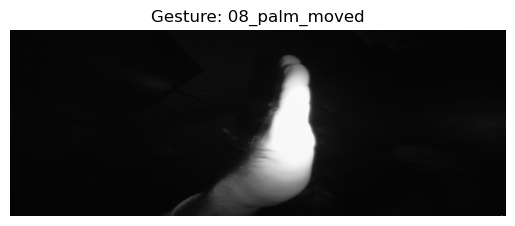

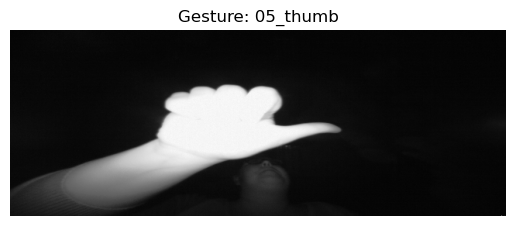

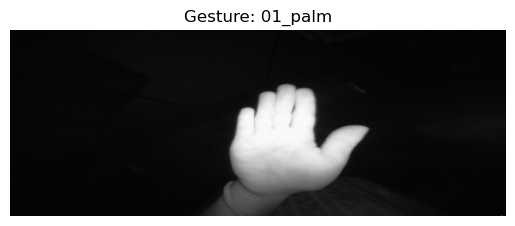

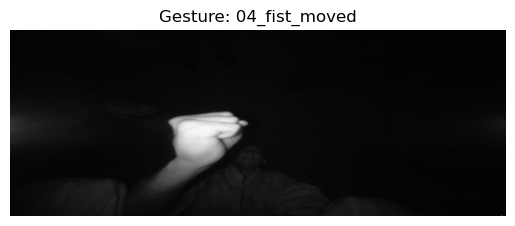

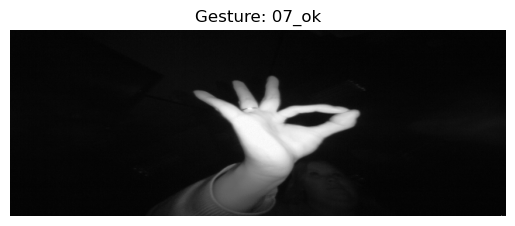

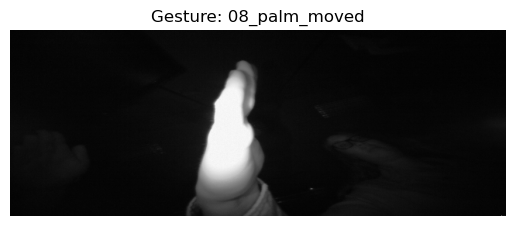

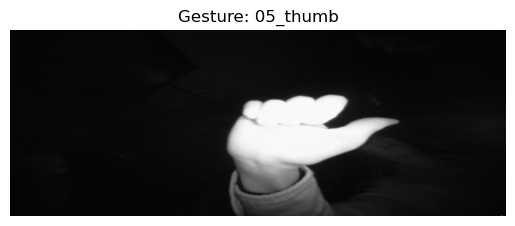

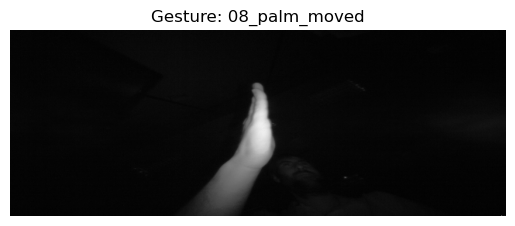

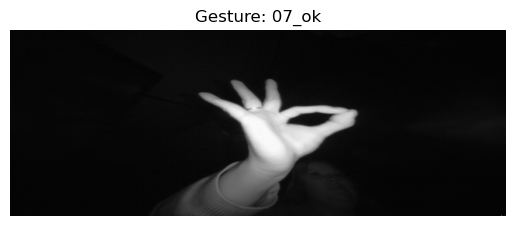

In [9]:
for i in range(10):
    image_path = random.choice(image_paths)
    image = load_img(image_path)
    plt.imshow(image)
    plt.title(f'Gesture: {labels[image_paths.index(image_path)]}')
    plt.axis('off')
    plt.show()

In [10]:
img = load_img(image_paths[0])
img_array = img_to_array(img)
img_array.shape

(240, 640, 3)

**Images look black and white but not accualy Gray-Scaled**

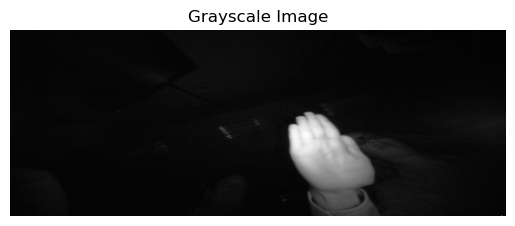

(240, 640)

In [11]:
gray_scaled = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_scaled, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()
gray_scaled.shape

# Preprocessing

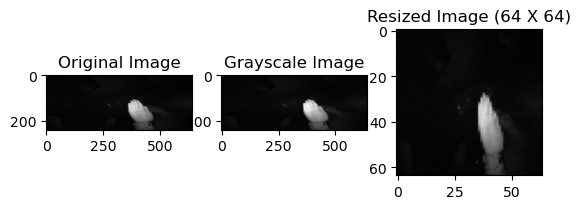

In [12]:
# Choose a sample Img
img_path = image_paths[0]
img = cv2.imread(img_path)

# Convert image to gray scalling
grayscale_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Resize image
resized_img = cv2.resize(grayscale_img, (64, 64))

# Create a figure with 1 row and 3 columns
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

# Display original image (assuming BGR format)
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image')

# Display grayscale image
ax2.imshow(grayscale_img, cmap='gray')
ax2.set_title('Grayscale Image')

# Display resized image
ax3.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
ax3.set_title('Resized Image (64 X 64)')

plt.show()

In [ ]:
labels_unique = np.unique(labels)
print(labels_unique)
for label in lables:
  num_nabels = label.split('_')[0]

In [14]:
X = []
y = []

for image_path, label in zip(image_paths, labels):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    resized_img = cv2.resize(img, (64, 64))
    X.append(resized_img)
    y.append(int(label.split('_')[0]) - 1)

print(f'numeric labels: {pd.unique(y)}')

X = np.array(X)
y = np.array(y)

X = X.reshape(-1, 64, 64, 1)
X = X / 255.0

y = to_categorical(y)

numeric labels: [0 1 2 3 4 5 6 7 8 9]


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [16]:
# create cnn model and train it

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10 classes for digits 1-10

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.7433 - loss: 0.7945 - val_accuracy: 0.9969 - val_loss: 0.0180
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.9953 - loss: 0.0165 - val_accuracy: 0.9997 - val_loss: 0.0035
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9965 - loss: 0.0106 - val_accuracy: 0.9953 - val_loss: 0.0258
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9991 - loss: 0.0030 - val_accuracy: 0.9969 - val_loss: 0.0103
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9996 - loss: 0.0019 - val_accuracy: 0.9994 - val_loss: 0.0028
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9997 - loss: 0.0023 - val_accuracy: 0.9994 - val_loss: 0.0025
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 1.0000 - loss: 7.1271e-05 - val_accuracy: 0.9997 - val_loss: 6.8861e-04
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 1.0000 - loss: 3

In [17]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print(classification_report(y_true_classes, y_pred_classes))

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       352
           1       1.00      1.00      1.00       429
           2       1.00      1.00      1.00       413
           3       1.00      1.00      1.00       413
           4       1.00      1.00      1.00       412
           5       1.00      1.00      1.00       397
           6       1.00      1.00      1.00       413
           7       1.00      1.00      1.00       387
           8       1.00      1.00      1.00       402
           9       1.00      1.00      1.00       382

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [20]:
sample_unit = X_test[0]
sample_unit_reshaped = sample_unit.reshape(1, 64, 64, 1)  # Reshape for model input

prediction = model.predict(sample_unit_reshaped)
predicted_class = np.argmax(prediction)

print(f"Predicted class: {predicted_class + 1}")  # Adding 1 to match original labels (1-10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Predicted class: 6


In [21]:
labels_unique = np.unique(labels)
print(labels_unique)

['01_palm' '02_l' '03_fist' '04_fist_moved' '05_thumb' '06_index' '07_ok'
 '08_palm_moved' '09_c' '10_down']


In [22]:
label_mapping = {i: label for i, label in enumerate(labels_unique)}
predicted_label = label_mapping.get(predicted_class, "Unknown")
print(f"Predicted label: {predicted_label}")

Predicted label: 06_index


In [23]:
label_mapping.get(7)

'08_palm_moved'

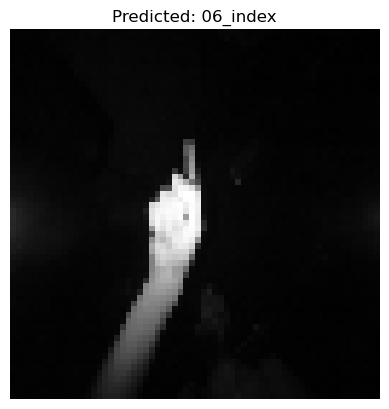

In [24]:
plt.imshow(sample_unit.reshape(64, 64), cmap='gray')
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()

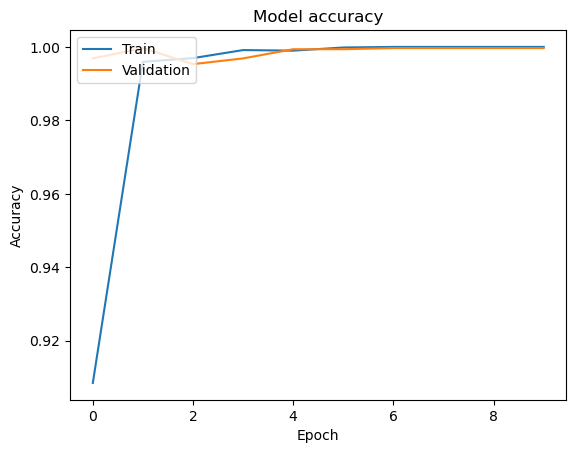

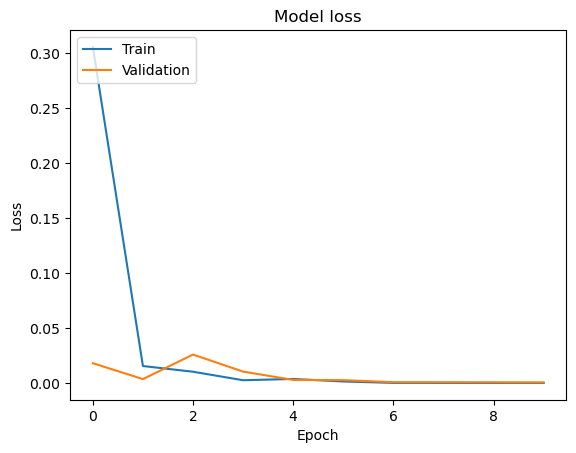

In [25]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


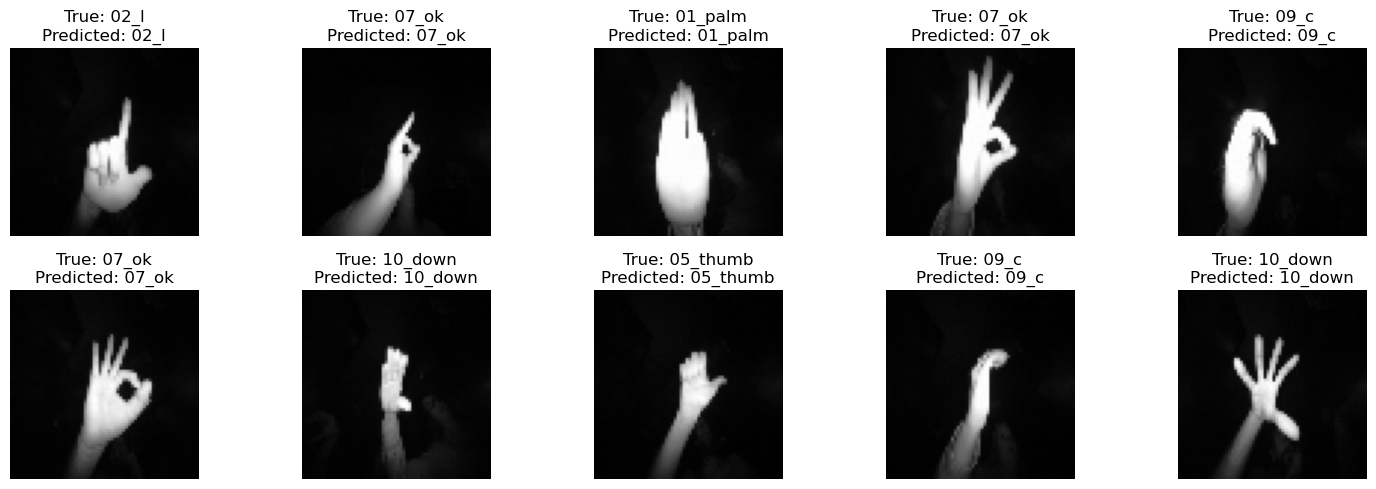

In [26]:
# Select 10 random samples from X_test
num_samples = 10
sample_indices = np.random.choice(X_test.shape[0], num_samples, replace=False)
sample_images = X_test[sample_indices]
true_labels = np.argmax(y_test[sample_indices], axis=1)

# Predict the labels for the sample images
predictions = model.predict(sample_images)
predicted_classes = np.argmax(predictions, axis=1)

# Visualize the samples and their predictions
plt.figure(figsize=(15, 5))
for i in range(num_samples):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_images[i].reshape(64, 64), cmap='gray')
    true_label = label_mapping.get(true_labels[i], "Unknown")
    predicted_label = label_mapping.get(predicted_classes[i], "Unknown")
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [27]:
# save model
model.save('hand_gesture_V2.h5')

In [ ]:
labels_unique = ['01_palm' '02_l' '03_fist' '04_fist_moved' '05_thumb' '06_index' '07_ok'
 '08_palm_moved' '09_c' '10_down']
label_mapping = {i: label for i, label in enumerate(labels_unique)}

# create function that predict img from directory
def predict_image(image_path, model):
  img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
  resized_img = cv2.resize(img, (64, 64))
  img_array = np.array(resized_img)
  img_array = img_array.reshape(-1, 64, 64, 1)
  img_array = img_array / 255.0
  prediction = model.predict(img_array)
  predicted_class = np.argmax(prediction)
  predicted_label = label_mapping.get(predicted_class, "Unknown")
  return predicted_label
